# 1 - Define the problem / Questions

# 2 - Data Collection

# 3 - Data Cleaning

- Handle missing values
- Identify and remove the duplicates
- Handle the outliers
- Transfer the data into suitable format

# 4 - EDA - Exploratory Data Analysis
# 5 - Data Visualization
# 6 - Analyze the insights & Report


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data in titanic variable

titanic = sns.load_dataset("titanic")

In [3]:
# lets start the initial data inspection

# check wheather the data is loaded or not

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# lets check the all data information

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#insights -
- we have total 891 passenger data. . where two features are in boolian , two features are in categorical data, two features are in float data, four features are in intiger, also we have five object feature.

- as we seen we have 891 passengers but the given data features contain some missing values

- so lets check the exact number

In [5]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# insights

- we have missing data like
- age have 177 missing values - should be imputed based on pclass, sex - replace by mean or median

- embarked /embarked town have 2 missing values - can be imputed with mode

- deck - massive missing values - better to drop this column

In [6]:
# impute the age missing values based on pclass and sex with median

In [7]:
titanic["age"] = titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

# categorical features always in paranthesis, and
# numerical features always in square braces
# note - Lambda is annonymous funcion that replace every iteration
# note - we use fill na- its fill the missing values with median
# note .transform is use for the line by line check with condition

In [8]:
titanic['age'].isnull().sum()

np.int64(0)

In [9]:
#replace the embarked with mode

In [10]:
titanic['embarked'].mode()[0]

'S'

In [11]:

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

#inplace True for permenent changes

<ipython-input-11-9acdbefd8952>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [12]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [13]:
#lets drop the unwanted columns
titanic.drop(columns=['deck', 'embark_town','who', 'alive', 'adult_male'], inplace=True)

In [14]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [15]:
# it may contain the duplicated values .
# so lets check weather the values  duplicated or not

In [16]:
titanic.duplicated().sum()

np.int64(118)

In [17]:
# as we seen we have 118 duplicated records - so lets drop it permenently
titanic.drop_duplicates(inplace= True)

In [18]:
# lets check it again
titanic.duplicated().sum()

np.int64(0)

In [19]:
# so finally lets check the shape of data
titanic.shape

(773, 10)

In [20]:
# so we have finl 773 passengers data -
# lets check for the statistical features

In [21]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,773.000000,773.000000,773,773.000000,773.000000,773.000000,773.000000,773,773,773
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,482,NaN,NaN,NaN,NaN,562,400,436
mean,0.415265,2.247089,NaN,29.558111,0.529107,0.421734,35.003315,NaN,NaN,NaN
std,0.493087,0.853070,NaN,13.988257,0.991280,0.841380,52.443053,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,16.100000,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,34.375000,NaN,NaN,NaN


# insights -
- Survival rate only  41% while 59% not survived
-  half of the passenger were in third class
- most passenger were young, adult median age is 30.but must be outliers shown 80 yer old also
- median fare is 35 $ but max was 512.33 it may contain outliers
- maximum male passenger and alone passenger
- maximum passenger embarked from "s" station
- most passenger is in thired class

# EDA

In [22]:
#1 -  What is the overall distribution of passengers across different classes
 #(Pclass)?


In [23]:
titanic['pclass'].unique()

array([3, 1, 2])

In [24]:
pclass_counts = titanic['pclass'].value_counts().sort_index()

In [25]:
pclass_counts

,count
pclass,
1,209
2,164
3,400


In [26]:
pclass_counts.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [27]:
pclass_counts.values

array([209, 164, 400])

<ipython-input-28-e67318c1c18f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pclass_counts.index,


Text(0.5, 1.0, 'Distribution of passenger accross pclass')

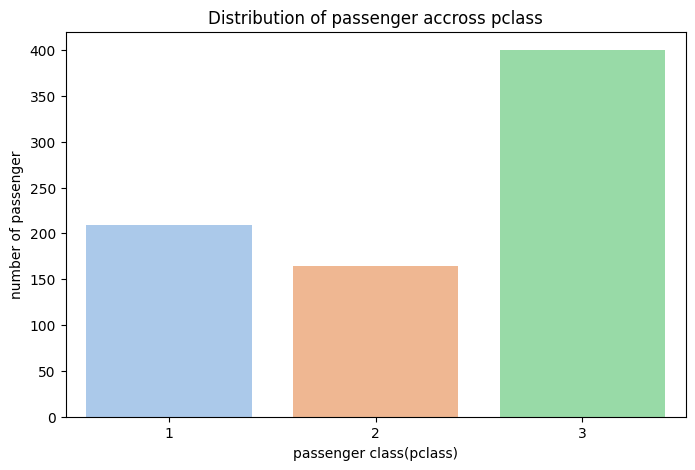

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x = pclass_counts.index,
            y = pclass_counts.values,
            palette='pastel')
plt.xlabel("passenger class(pclass)")
plt.ylabel("number of passenger")
plt.title("Distribution of passenger accross pclass")

# insights

- majority of the passenger traveled in pclass 3 , indicating it was the most affordable and populer

- pclass 1 had the moderate number of passenger, suggesting fewer people could afford luxury travel

- pclass 2 had the least number of passenger showing middle class passenger presence on the titanic

In [29]:
#2 - How is the age of passengers distributed?

Text(0.5, 1.0, 'Distribution of the Passenger Age')

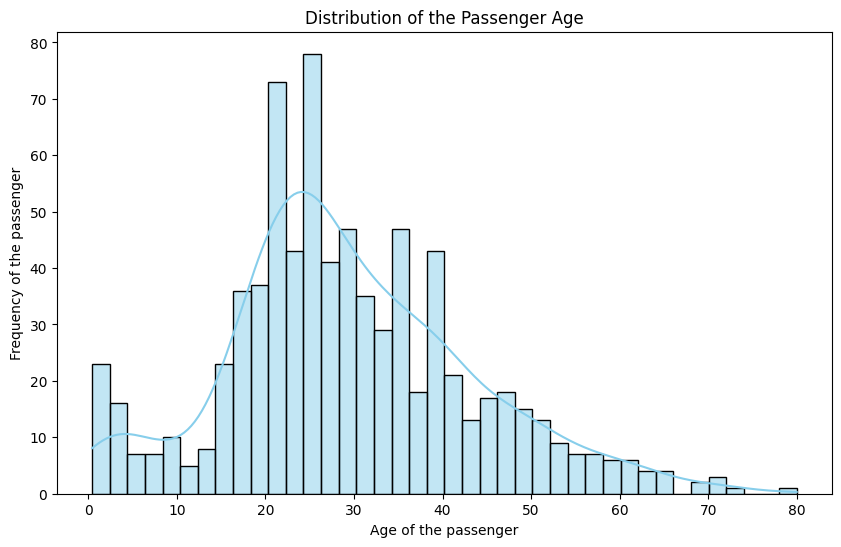

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic, x = 'age', bins = 40,
             kde = True, color = 'skyblue')
plt.xlabel("Age of the passenger")
plt.ylabel("Frequency of the passenger")
plt.title("Distribution of the Passenger Age")

# insights

- the peak age group is 20 -30 year - indicating many young adult passenger traveled

- there are fewer childrens (age < 10) and elderly (age > 60) on board

- the age distribution has a tail on the right side, indicating some passengers were much older (may be outlier) , not to be board

In [31]:
#3-What is the distribution of passengers based on Sex?

In [32]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
gender_count = titanic['sex'].value_counts()

In [34]:
gender_count

,count
sex,
male,482
female,291


<ipython-input-35-0b61b6f38e8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_count.index,


Text(0.5, 1.0, 'Distribution of passenger based on gender')

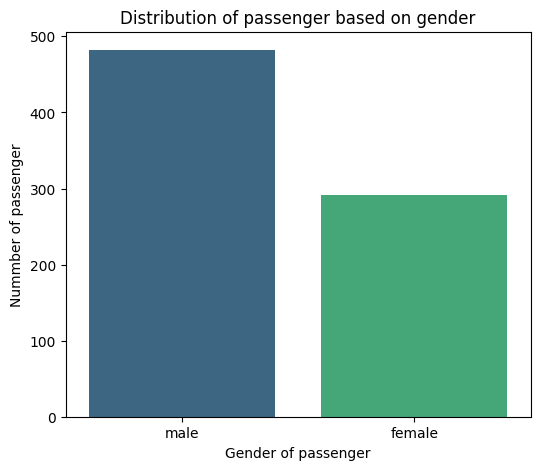

In [35]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_count.index,
            y = gender_count.values,
            palette='viridis')
plt.xlabel("Gender of passenger")
plt.ylabel("Nummber of passenger")
plt.title("Distribution of passenger based on gender")

#insights

- The dataset shows more male passenger than demales

- Since the titanic was a mix emigrants, workders, healthly workers, men might have traveles more for work and opportunity.

In [36]:
#4 How many passengers embarked from each port (Embarked)?

In [37]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [38]:
# S- Southampton , C - Cherbourg , Q - Queenstown

In [39]:
embarked_count = titanic['embarked'].value_counts()

In [40]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-41-f0fc83a0a081>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= embarked_count.index,


Text(0.5, 1.0, 'Number of passenger from each port')

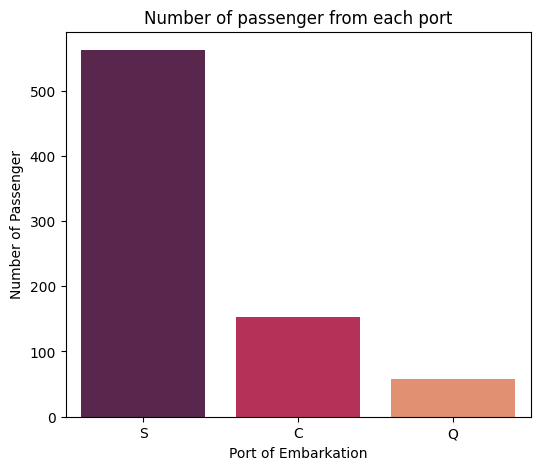

In [41]:
plt.figure(figsize=(6,5))
sns.barplot(x= embarked_count.index,
            y = embarked_count.values,
            palette = 'rocket')
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of Passenger")
plt.title("Number of passenger from each port")

#insights
-

In [42]:
# 5  What is the survival rate overall, and how does it vary by Pclass?

In [43]:
overall_survival_rate = titanic['survived'].mean()*100

In [44]:
overall_survival_rate

np.float64(41.52652005174644)

In [45]:
survival_rate_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [46]:
survival_rate_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


<ipython-input-47-634f99984e67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= survival_rate_pclass.index,


Text(0.5, 1.0, 'Survival Rate by pclass(%)')

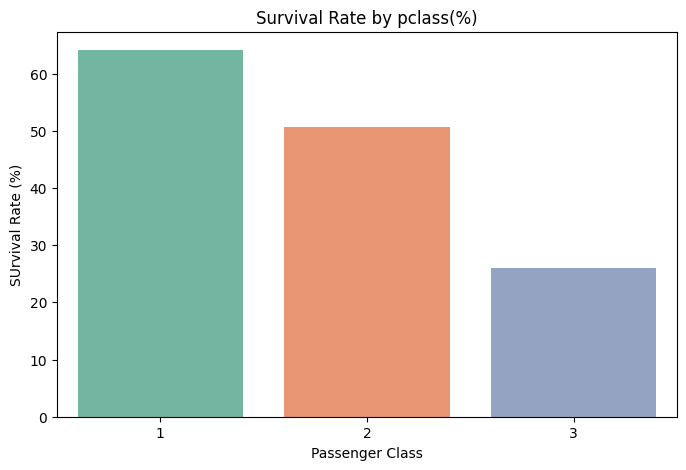

In [47]:
plt.figure(figsize=(8,5))
sns.barplot( x= survival_rate_pclass.index,
            y = survival_rate_pclass.values,
             palette= 'Set2')
plt.xlabel("Passenger Class")
plt.ylabel("SUrvival Rate (%)")
plt.title("Survival Rate by pclass(%)")

# insights
-

In [48]:
# 6 -What is the survival rate for males vs. females?

In [49]:
survival_Rate_gender = titanic.groupby('sex')['survived'].mean()*100

In [50]:
survival_Rate_gender

,survived
sex,
female,73.883162
male,21.991701


<ipython-input-51-6fe148d4d408>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = survival_Rate_gender.index,


Text(0.5, 1.0, 'Survival rate by gender')

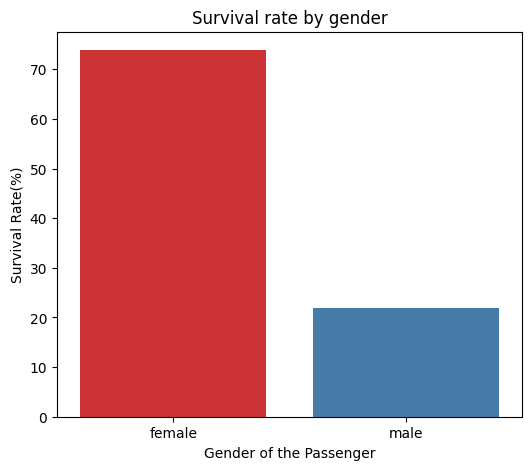

In [51]:
plt.figure(figsize=(6,5))
sns.barplot(x = survival_Rate_gender.index,
            y = survival_Rate_gender.values,
            palette='Set1')
plt.xlabel("Gender of the Passenger")
plt.ylabel("Survival Rate(%)")
plt.title("Survival rate by gender")

In [52]:
# 7. What is the survival rate for passengers from different embarkation points (Embarked)?

In [53]:
# 8 How does the survival rate vary across different ticket classes (Pclass)?

In [54]:
# 9  Is there any relationship between the number of siblings/spouses aboard (SibSp) and survival?

In [55]:
titanic['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [56]:
# 10  How does the number of parents/children aboard (Parch) affect survival?

In [57]:
survival_by_parch = titanic.groupby("parch")['survived'].mean()*100

In [58]:
survival_by_parch

,survived
parch,
0,37.609842
1,55.263158
2,53.333333
3,60.000000
4,0.000000
5,20.000000
6,0.000000


<ipython-input-59-18ff8db05d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_parch.index,


Text(0.5, 1.0, 'Survival Rate by Parch')

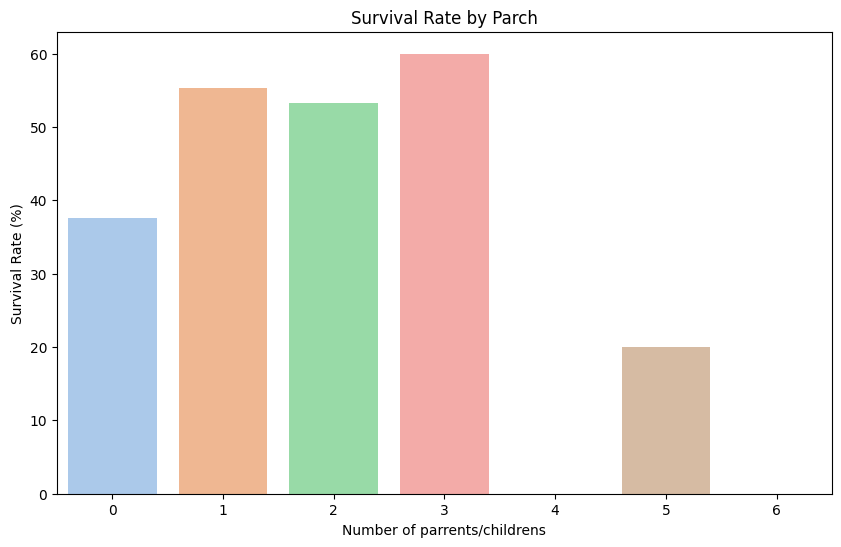

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_parch.index,
            y=survival_by_parch.values,
            palette='pastel')
plt.xlabel("Number of parrents/childrens")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Parch")

In [60]:
# 11. How does the fare distribution vary across different passenger classes (Pclass)?

In [61]:
titanic.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


In [62]:
# lets check for the outliers

<ipython-input-63-ed203d77196f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic, x = 'pclass', y = 'fare', palette='hls')


Text(0.5, 1.0, 'Outlier detection in fare according pclass')

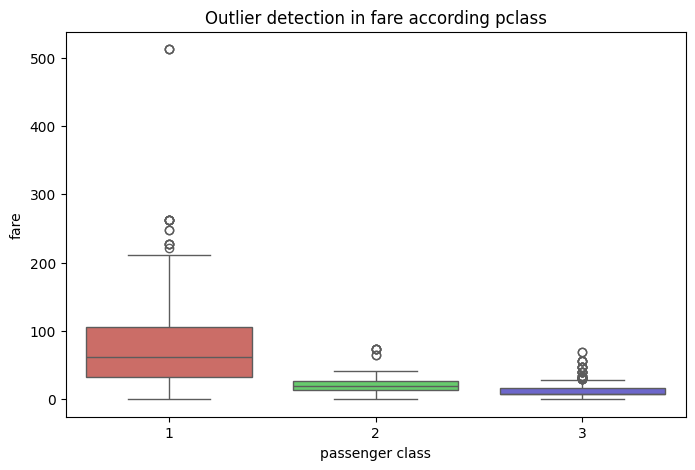

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(data = titanic, x = 'pclass', y = 'fare', palette='hls')
plt.xlabel("passenger class")
plt.ylabel("fare")
plt.title("Outlier detection in fare according pclass")

In [64]:
Q1 = titanic.groupby('pclass')['fare'].quantile(0.25)

In [65]:
Q2 = titanic.groupby('pclass')['fare'].quantile(0.50)

In [66]:
Q3 = titanic.groupby('pclass')['fare'].quantile(0.75)

In [67]:
IQR = Q3 - Q1

In [68]:
Upper_bound = Q3 + 1.5 * IQR

In [69]:
Upper_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875


In [70]:
titanic_latest = titanic[
    ((titanic['pclass'] == 1) & (titanic['fare'] <= 217.5813)) |
    ((titanic['pclass'] == 2) & (titanic['fare'] <= 45.5000)) |
    ((titanic['pclass'] == 3) & (titanic['fare'] <= 28.0875))
]

<ipython-input-71-21253559167e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic_latest , x = 'pclass',


<Axes: xlabel='pclass', ylabel='fare'>

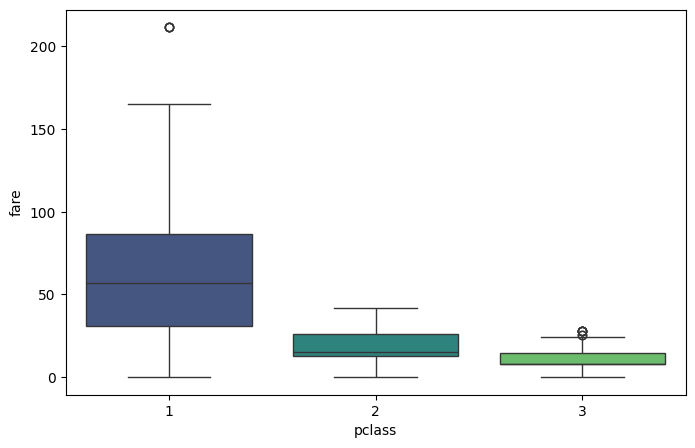

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(data= titanic_latest , x = 'pclass',
            y ='fare', palette='viridis')


In [72]:
titanic.shape

(773, 10)

In [73]:
titanic_latest.shape

(711, 10)

<Axes: xlabel='fare', ylabel='Count'>

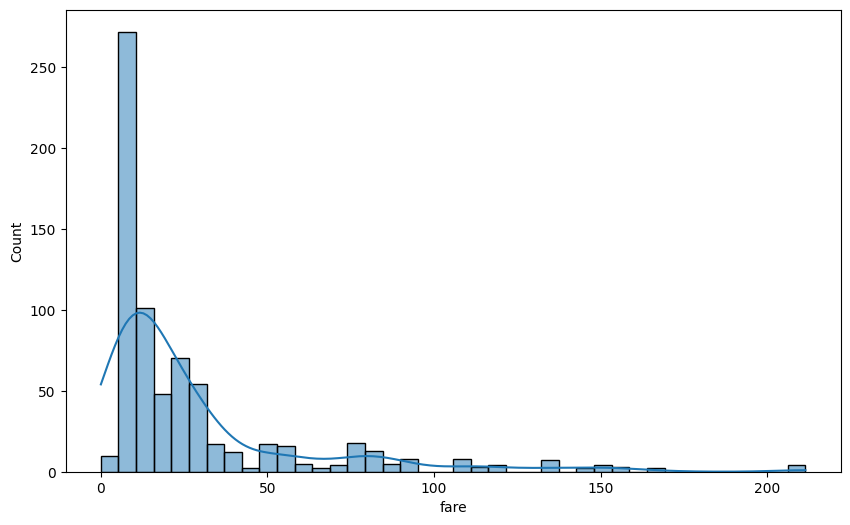

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data= titanic_latest, x = 'fare', kde=True,  bins= 40)

In [75]:
 # 12 What is the relationship between age and survival rates?

In [76]:
titanic['age'].describe()

,age
count,773.000000
mean,29.558111
std,13.988257
min,0.420000
25%,21.000000
50%,28.000000
75%,38.000000
max,80.000000


In [77]:
 x = [0,10,20,30,40,50,60,70,80]
 y = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

In [78]:
titanic['age_group'] = pd.cut(titanic['age'], bins = x,
                              labels= y)

In [79]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40


In [80]:
age_survival = titanic.groupby('age_group')['survived'].mean()*100

<ipython-input-80-3188c01f1e72>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].mean()*100


In [81]:
age_survival

,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


<ipython-input-82-27b52f7f2f64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= age_survival.index,


<Axes: xlabel='age_group'>

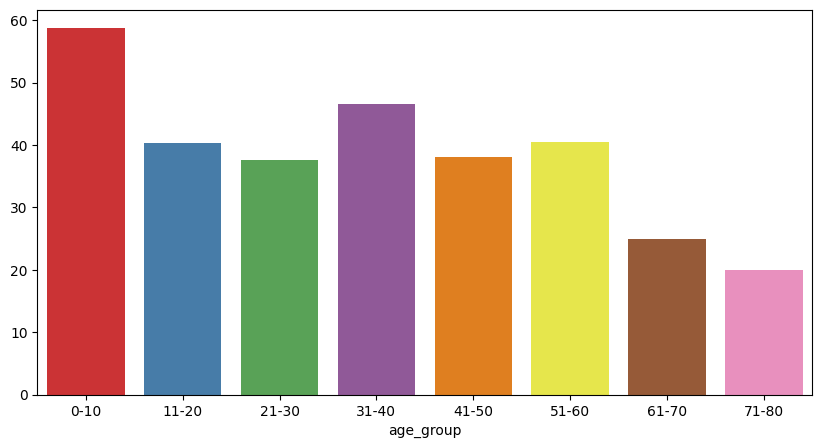

In [82]:
plt.figure(figsize=(10,5))
sns.barplot( x= age_survival.index,
            y = age_survival.values,
             palette='Set1')

In [83]:
# 13. What is the correlation between Fare, Pclass, and survival? 1

In [84]:
corr_matrix = titanic[['fare', 'pclass', 'survived']].corr()

In [85]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.554939,0.244176
pclass,-0.554939,1.000000,-0.336633
survived,0.244176,-0.336633,1.000000


<Axes: >

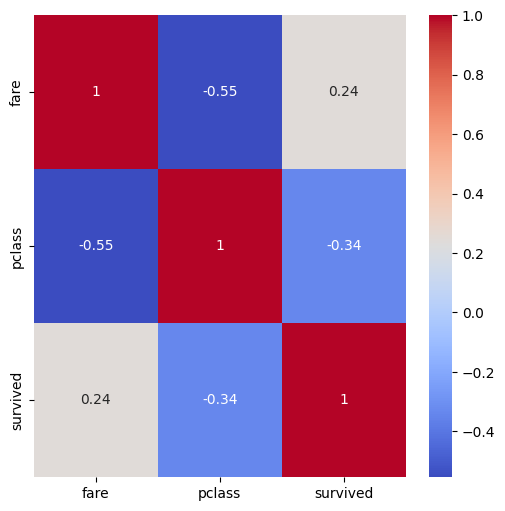

In [86]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm' )

In [87]:
#14. What are the age ranges of survivors vs. non-survivors?

<ipython-input-88-7ca93141e6ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic, x='survived', y='age', palette='pastel')


<Axes: xlabel='survived', ylabel='age'>

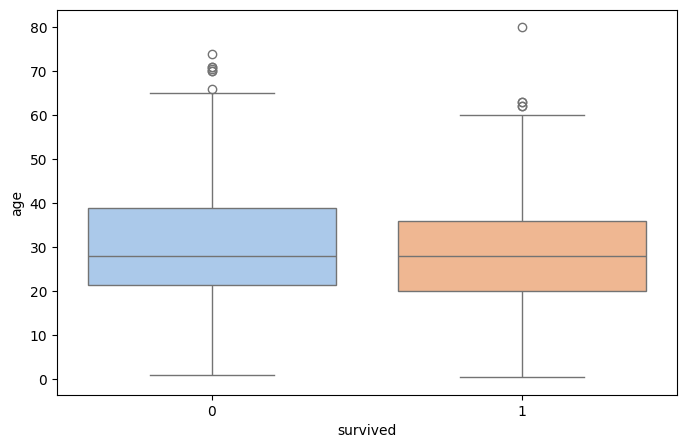

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(data= titanic, x='survived', y='age', palette='pastel')

<ipython-input-89-2280317b102e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic, x='age', palette='pastel')


<Axes: xlabel='age'>

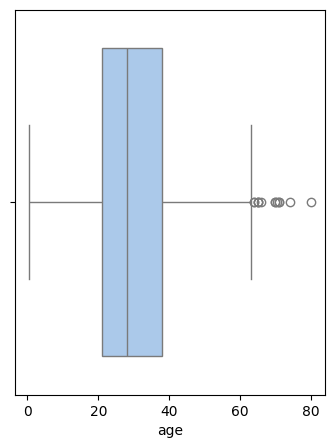

In [89]:
plt.figure(figsize=(4,5))
sns.boxplot(data= titanic, x='age', palette='pastel')

In [90]:
#lets try with removing outliers


In [91]:
Q1 = titanic['age'].quantile(0.25)
Q2 = titanic['age'].quantile(0.50)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

In [92]:
Upper_bound = Q3 + 1.5 *IQR

In [93]:
Upper_bound

np.float64(63.5)

In [94]:
titanic_clean = titanic[ titanic['age']<= 63.5]

In [95]:
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40


<ipython-input-96-bf4bb7bd467e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic_clean, x='survived', y='age', palette='pastel')


<Axes: xlabel='survived', ylabel='age'>

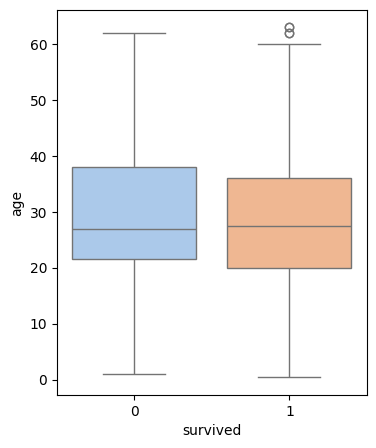

In [96]:
plt.figure(figsize=(4,5))
sns.boxplot(data= titanic_clean, x='survived', y='age', palette='pastel')

In [97]:
Q1 = titanic.groupby('survived')['age'].quantile(0.25)
Q2 = titanic.groupby('survived')['age'].quantile(0.50)
Q3 = titanic.groupby('survived')['age'].quantile(0.75)

In [98]:
IQR = Q3 - Q1

In [99]:
upper_bound = Q3 + 1.5 * IQR

In [100]:
upper_bound

,age
survived,
0,65.25
1,60.00


In [101]:
# 15. Younger with respective to older

In [103]:
X = [0,18,30,60,80]
Y = ['child', 'young', 'adult', 'old_age']

In [104]:
titanic['New_age'] = pd.cut(titanic['age'], bins = X, labels=Y)

In [105]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,New_age
0,0,3,male,22.0,1,0,7.25,S,Third,False,21-30,young


In [106]:
new_age_survival = titanic.groupby('New_age')['survived'].mean()*100

<ipython-input-106-52f3d0a5282f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_age_survival = titanic.groupby('New_age')['survived'].mean()*100


In [107]:
new_age_survival

,survived
New_age,
child,51.111111
young,36.990596
adult,43.288591
old_age,23.809524


<ipython-input-109-69659f96a615>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_age_survival.index,


<Axes: xlabel='New_age'>

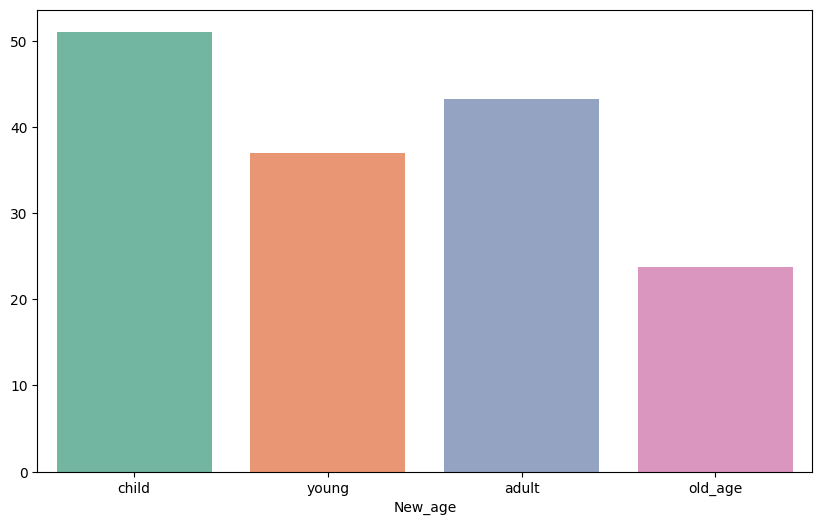

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(x=new_age_survival.index,
            y=new_age_survival.values,
            palette="Set2")

In [110]:
# insights

# 16. what is the survival rate for families(passengers with Sibsp or Parch>0)

In [114]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,New_age
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30,young
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30,young
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40,adult


In [115]:
titanic['alone'].unique()

array([False,  True])

In [116]:
survival_rate_families = titanic.groupby('alone')['survived'].mean()*100

In [117]:
survival_rate_families

,survived
alone,
False,51.038576
True,34.174312


In [118]:
survival_rate_families.index = ["Family traveler", "Solo traveler"]

In [119]:
survival_rate_families

,survived
Family traveler,51.038576
Solo traveler,34.174312


<ipython-input-121-650713318061>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_families.index,


<Axes: xlabel='None'>

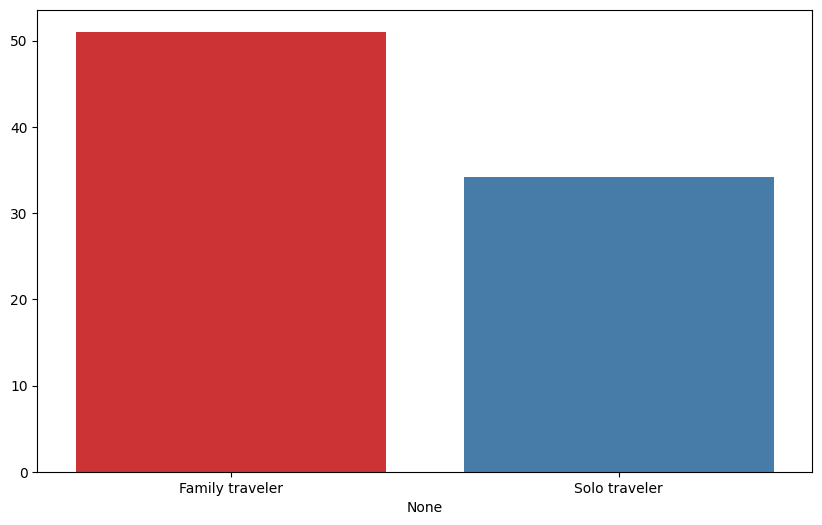

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(x=survival_rate_families.index,
            y=survival_rate_families.values,
            palette='Set1')

In [122]:
#insights

# 17. What is the distribution of the family sizeamong passengers and how does it affect

In [123]:
titanic['family_size'] = titanic['sibsp']+titanic['parch']+1

In [124]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,New_age,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30,young,2
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40,adult,2
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30,young,1
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40,adult,2
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40,adult,1


In [125]:
titanic['family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [126]:
survival_rate_familysize = titanic.groupby('family_size')['survived'].mean()*100

In [127]:
survival_rate_familysize

,survived
family_size,
1,34.174312
2,54.901961
3,57.425743
4,71.428571
5,23.076923
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [128]:
titanic['family_size'].value_counts()

,count
family_size,
1,436
2,153
3,101
4,28
6,22
5,13
7,12
8,6
11,2


In [129]:
titanic.groupby(['pclass','family_size'])['survived'].mean()*100 # by default vertical view

pclass  family_size
1       1               55.339806
        2               72.463768
        3               75.000000
        4               71.428571
        5              100.000000
        6               50.000000
2       1               38.372093
        2               53.125000
        3               67.741935
        4               76.923077
        5              100.000000
        6              100.000000
3       1               23.886640
        2               32.692308
        3               41.304348
        4               62.500000
        5                0.000000
        6                0.000000
        7               33.333333
        8                0.000000
        11               0.000000
Name: survived, dtype: float64

In [131]:
titanic.groupby(['pclass','family_size'])['survived'].mean().unstack()*100  # horizontal view

family_size,1,2,3,4,5,6,7,8,11
pclass,,,,,,,,,
1,55.339806,72.463768,75.000000,71.428571,100.0,50.0,NaN,NaN,NaN
2,38.372093,53.125000,67.741935,76.923077,100.0,100.0,NaN,NaN,NaN
3,23.886640,32.692308,41.304348,62.500000,0.0,0.0,33.333333,0.0,0.0


<ipython-input-132-2f97caa98085>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_familysize.index,


<Axes: xlabel='family_size'>

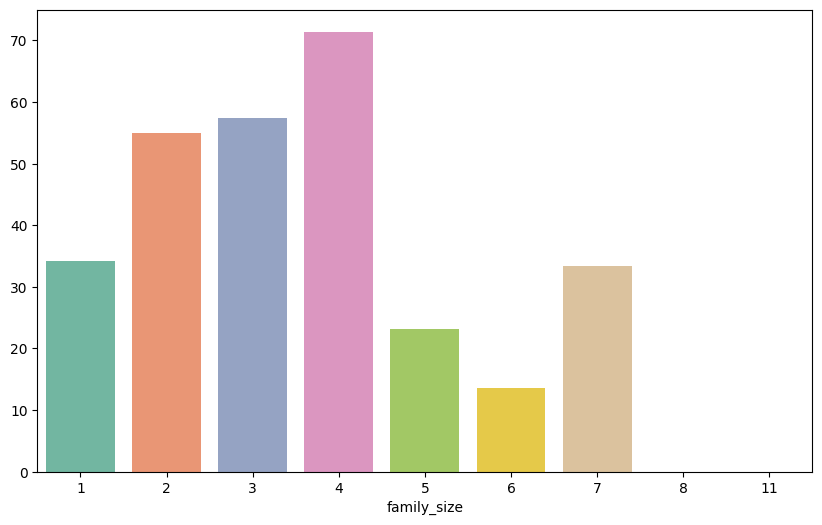

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(x=survival_rate_familysize.index,
            y=survival_rate_familysize.values,
            palette='Set2')

# 18. how survival rate differ for passenger who paid exponentially high fares

<Axes: xlabel='fare'>

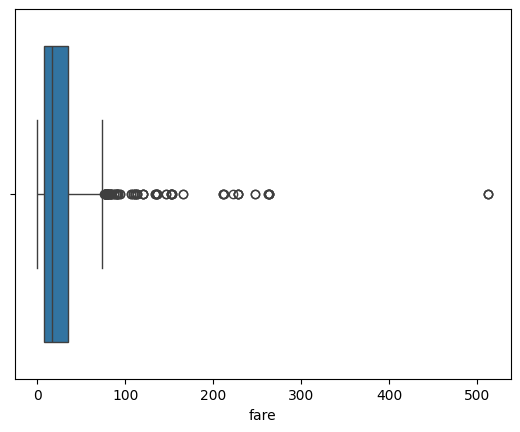

In [133]:
sns.boxplot(data=titanic , x='fare')

In [135]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)

In [136]:
IQR = Q3 - Q1
upper_bound_fare = Q3 + 1.5 *IQR

In [137]:
upper_bound_fare

np.float64(73.8625)

In [138]:
titanic['high_fare'] = np.where(titanic['fare']>upper_bound_fare, "High fare", "Low fare")

In [140]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,New_age,family_size,high_fare
283,1,3,male,19.0,0,0,8.0500,S,Third,True,11-20,young,1,Low fare
659,0,1,male,58.0,0,2,113.2750,C,First,False,51-60,adult,3,High fare
244,0,3,male,30.0,0,0,7.2250,C,Third,True,21-30,young,1,Low fare
375,1,1,female,35.0,1,0,82.1708,C,First,False,31-40,adult,2,High fare
321,0,3,male,27.0,0,0,7.8958,S,Third,True,21-30,young,1,Low fare
6,0,1,male,54.0,0,0,51.8625,S,First,True,51-60,adult,1,Low fare
783,0,3,male,25.0,1,2,23.4500,S,Third,False,21-30,young,4,Low fare
5,0,3,male,25.0,0,0,8.4583,Q,Third,True,21-30,young,1,Low fare
138,0,3,male,16.0,0,0,9.2167,S,Third,True,11-20,child,1,Low fare
129,0,3,male,45.0,0,0,6.9750,S,Third,True,41-50,adult,1,Low fare


In [141]:
survival_by_fare = titanic.groupby('high_fare')['survived'].mean()*100

In [142]:
survival_by_fare

,survived
high_fare,
High fare,76.288660
Low fare,36.538462


In [143]:
plt.figure(figsize)

NameError: name 'figsize' is not defined

# 19 Gender based diff in survival within each class(Pclass)?

In [144]:
gender_survival = titanic.groupby(['pclass' , 'sex'])['survived'].mean().unstack()*100

In [145]:
gender_survival

sex,female,male
pclass,,
1,96.739130,38.461538
2,91.666667,18.478261
3,47.244094,16.117216


<Axes: xlabel='pclass', ylabel='survived'>

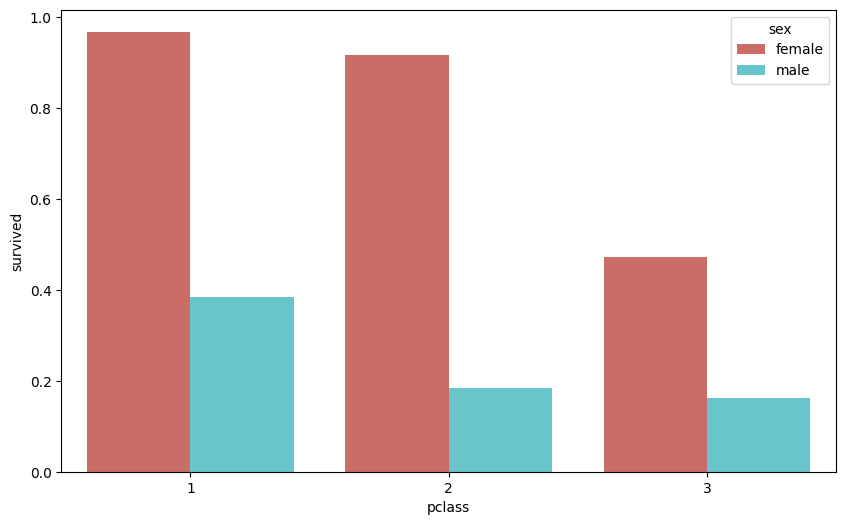

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(data = titanic , x='pclass' ,
            y='survived' , hue='sex' , palette='hls' , errorbar = None
            )

In [149]:
#insights - pclass 1 has higher survival rate in both male and female

# 20. how does survival vary among passengers who embarked from diff port

# 21. Create a heatmap to visualize the correlation between numeric feature?

In [154]:
corr_matrix = titanic.corr(numeric_only = True)

In [155]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare,alone,family_size
survived,1.000000,-0.336633,-0.074413,-0.041987,0.067514,0.244176,-0.169709,0.009960
pclass,-0.336633,1.000000,-0.397498,0.088753,0.038709,-0.554939,0.110988,0.079076
age,-0.074413,-0.397498,1.000000,-0.289343,-0.189057,0.114124,0.200088,-0.292488
sibsp,-0.041987,0.088753,-0.289343,1.000000,0.379745,0.132237,-0.607515,0.859834
parch,0.067514,0.038709,-0.189057,0.379745,1.000000,0.189811,-0.570499,0.798845
fare,0.244176,-0.554939,0.114124,0.132237,0.189811,1.000000,-0.242704,0.190746
alone,-0.169709,0.110988,0.200088,-0.607515,-0.570499,-0.242704,1.000000,-0.709902
family_size,0.009960,0.079076,-0.292488,0.859834,0.798845,0.190746,-0.709902,1.000000


<Axes: >

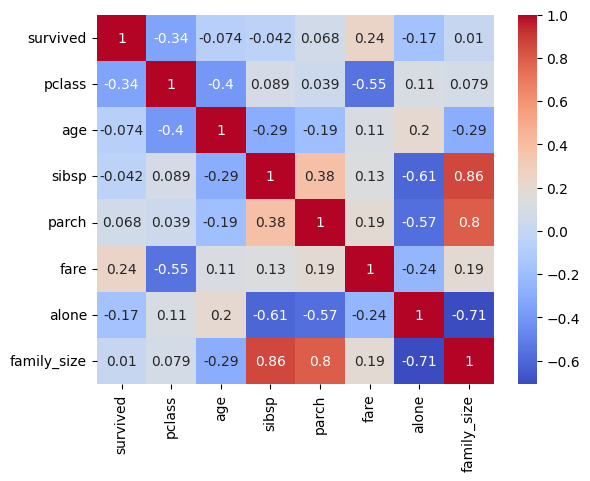

In [156]:
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm')
#plt.show() or %matplotlib inline  is used if graph is not showed

# 25. Pair plot

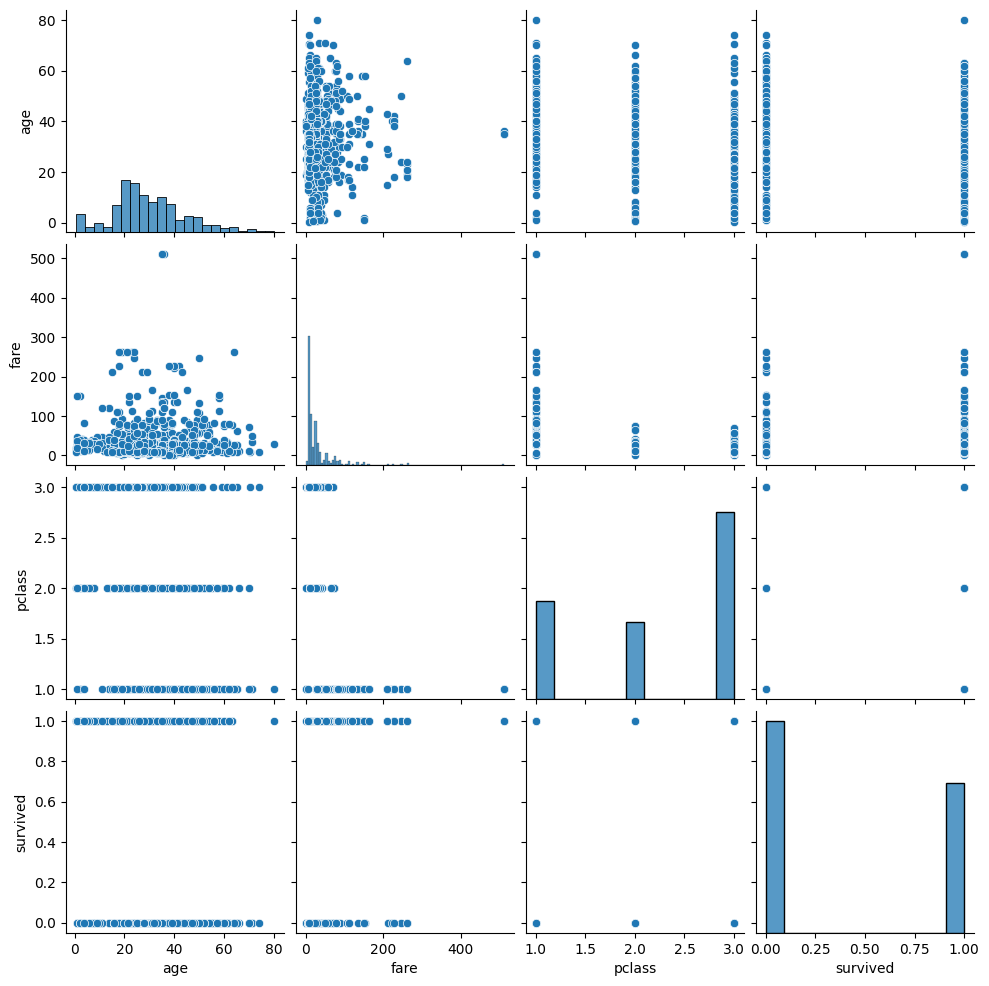

In [157]:
sns.pairplot(titanic[['age','fare','pclass','survived']])